# **Previsão de Séries Temporais do Preço do Ouro**

## Introdução

Este projeto do fornece um código para prever o preço do ouro usando vários métodos de previsão de séries temporais. O conjunto de dados usado para a análise é o preço diário do ouro em USD de 1950-01 a 2020-07, com um total de 847 pontos de dados. O notebook Jupyter incluído no repositório contém código para construir e avaliar três modelos diferentes de previsão de séries temporais: Modelo de Regressão Linear, Modelo Naive e Modelo de Suavização Exponencial. O Modelo de Suavização Exponencial obteve o melhor desempenho com uma pontuação MAPE de 17.235%. Os preços do ouro previstos para o período de 2020-08 a 2025-02 usando o Modelo de Suavização Exponencial também estão fornecidos em um arquivo CSV chamado gold_price_predictions.csv. O conjunto de dados, código e resultados podem ser acessados através do projeto no Kaggle e do repositório no Github fornecidos nas referências.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
from sklearn.linear_model import LinearRegression
import warnings

warnings.filterwarnings("ignore")

In [2]:
# Read the CSV file and display the first few rows
df = pd.read_csv('gold_monthly_csv.csv')
print(f"O conjunto de dados de preços do ouro possui {df.shape[0]} linhas e {df.shape[1]} colunas.")
print(f"O intervalo de datas disponíveis para os preços do ouro é de {df.loc[:, 'Date'][0]} a {df.loc[:, 'Date'][len(df) - 1]}.")
df.head()


O conjunto de dados de preços do ouro possui 847 linhas e 2 colunas.
O intervalo de datas disponíveis para os preços do ouro é de 1950-01 a 2020-07.


,Date,Price
0,1950-01,34.73
1,1950-02,34.73
2,1950-03,34.73
3,1950-04,34.73
4,1950-05,34.73


In [3]:
# Create a new dataframe with monthly dates as the index
date_range = pd.date_range(start='1/1/1950', end='8/1/2020', freq='M')
df['month'] = date_range
df.drop('Date', axis=1, inplace=True)
df = df.set_index('month')
df.head()


,Price
month,
1950-01-31,34.73
1950-02-28,34.73
1950-03-31,34.73
1950-04-30,34.73
1950-05-31,34.73


<Figure size 2000x800 with 0 Axes>

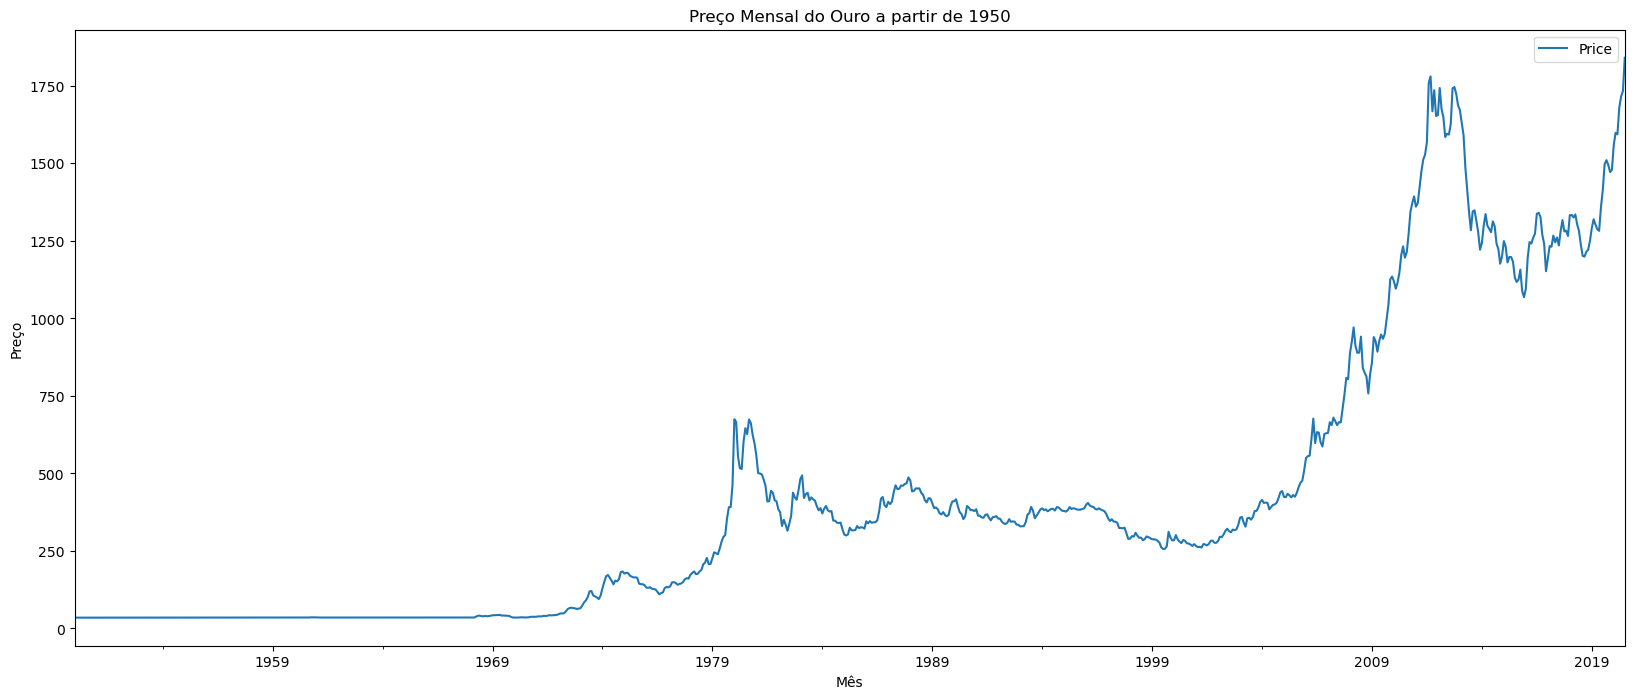

In [4]:
# Plot the gold prices over time
plt.figure(figsize=(20, 8))
df.plot(figsize=(20, 8))
plt.title('Preço Mensal do Ouro a partir de 1950')
plt.xlabel('Mês')
plt.ylabel('Preço')
plt.show()


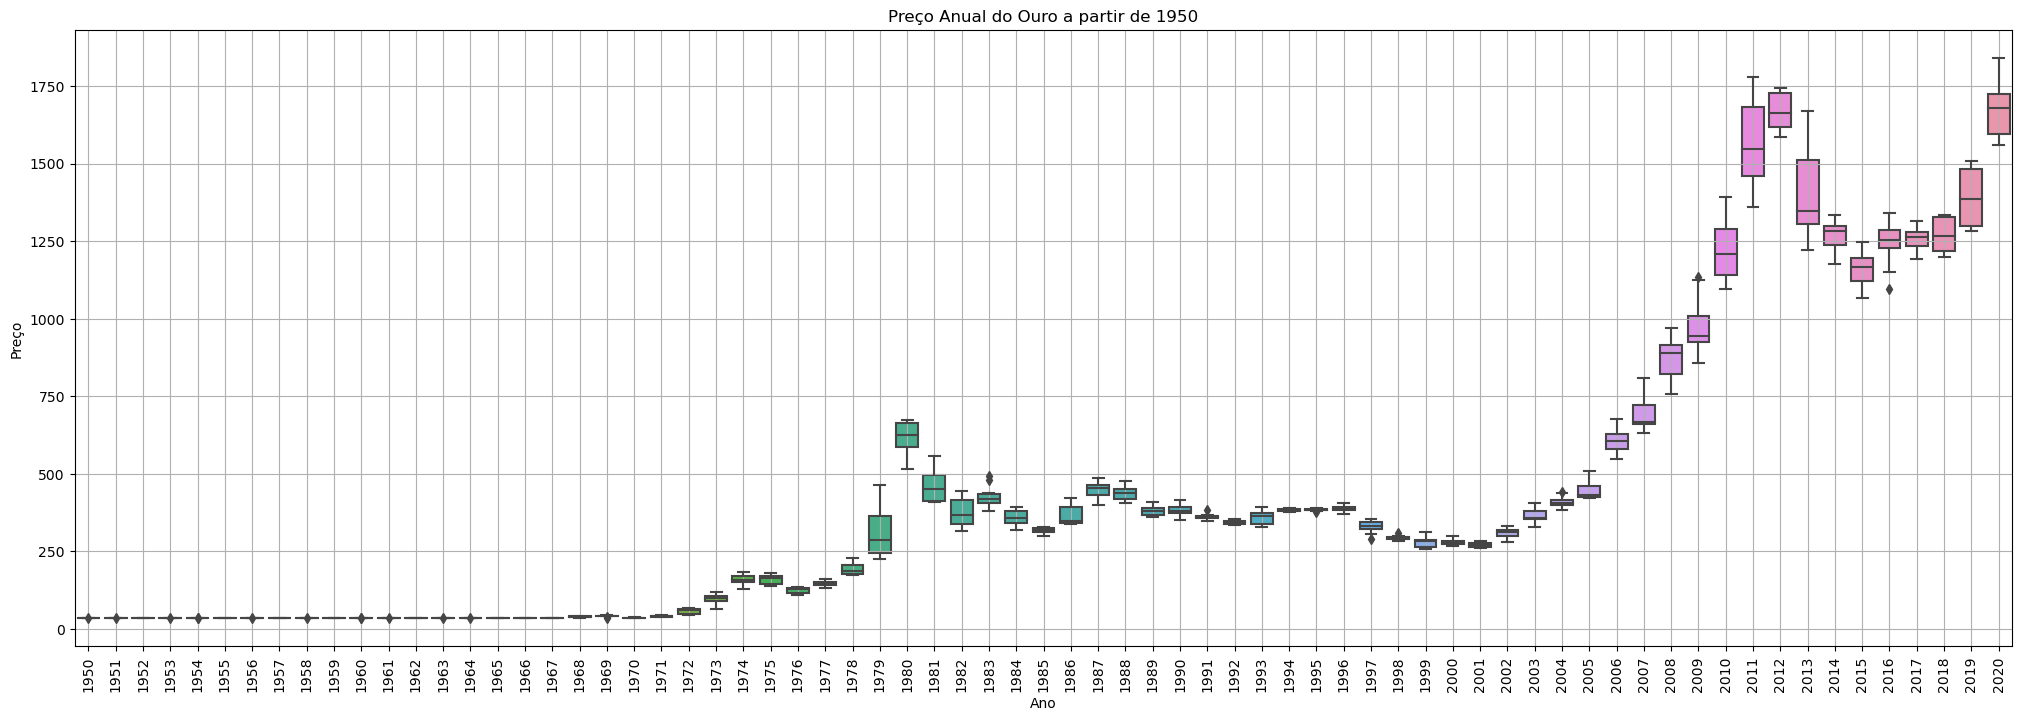

In [5]:
# Create a boxplot of the gold prices by year
plt.figure(figsize=(25, 8))
sns.boxplot(x=df.index.year, y=df.values[:, 0])
plt.title('Preço Anual do Ouro a partir de 1950')
plt.xlabel('Ano')
plt.ylabel('Preço')
plt.xticks(rotation=90)
plt.grid()
plt.show()


In [6]:
# Show summary statistics of the gold prices
print("Resumo estatístico dos preços do ouro:\n", df.describe())


Resumo estatístico dos preços do ouro:
              Price
count   847.000000
mean    416.556906
std     453.665313
min      34.490000
25%      35.190000
50%     319.622000
75%     447.029000
max    1840.807000


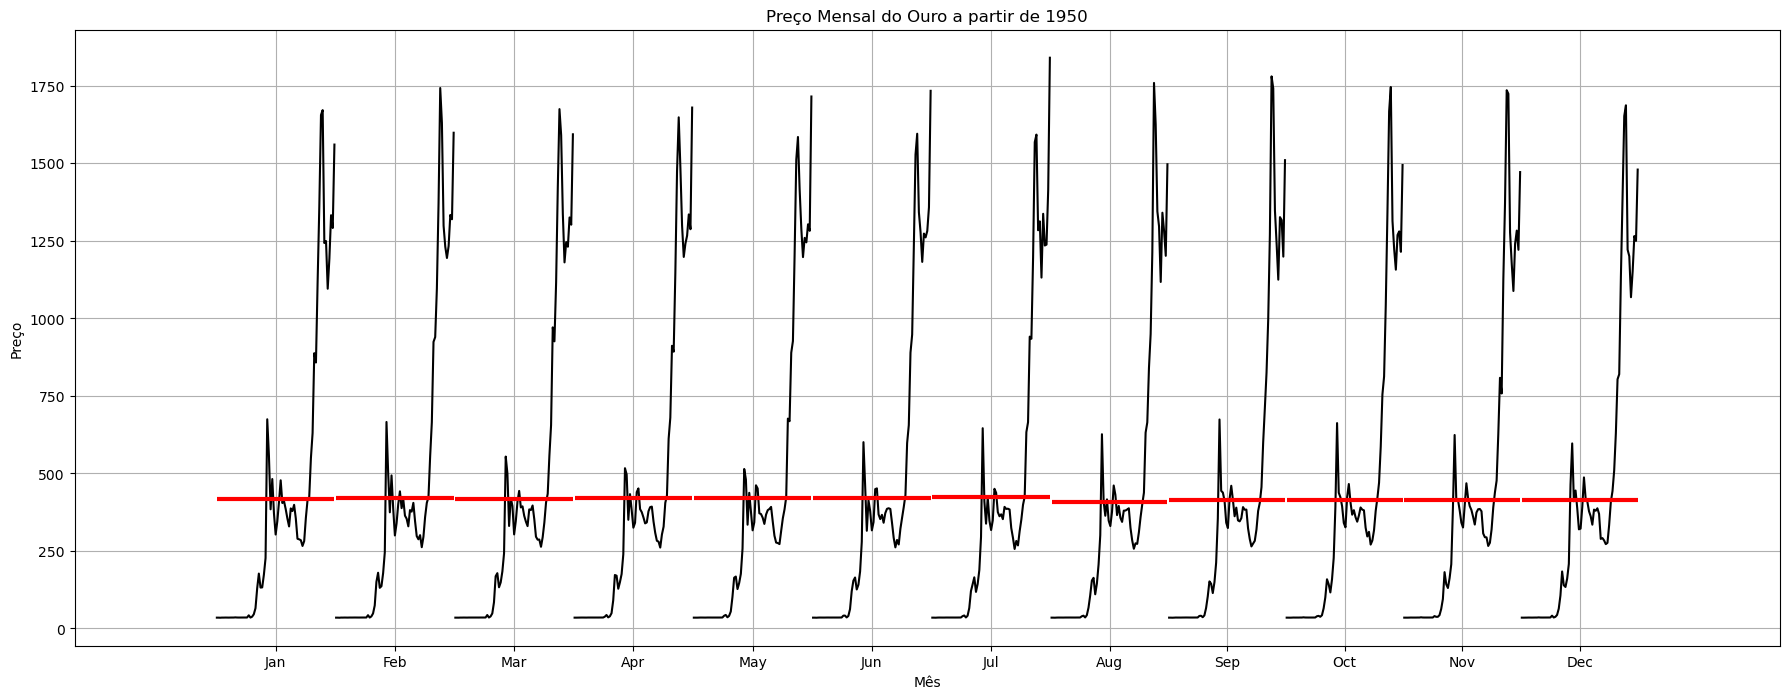

In [7]:
from statsmodels.graphics.tsaplots import month_plot

# Plot the gold prices by month
fig, ax = plt.subplots(figsize=(22, 8))
month_plot(df, ylabel='Preço do Ouro', ax=ax)
plt.title('Preço Mensal do Ouro a partir de 1950')
plt.xlabel('Mês')
plt.ylabel('Preço')
plt.grid()
plt.show()


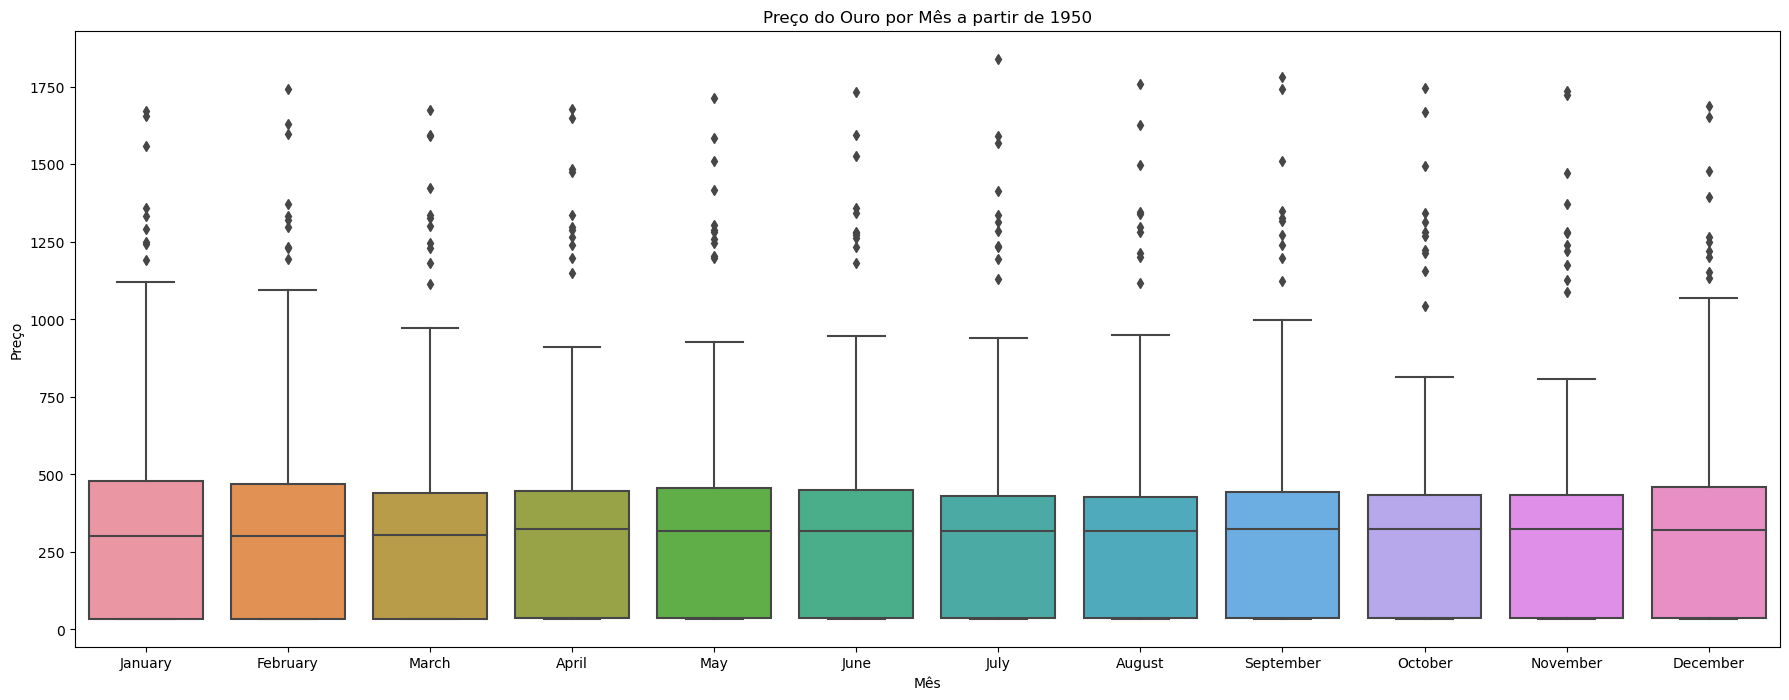

In [8]:
# Create a boxplot of the gold prices by month
fig, ax = plt.subplots(figsize=(22, 8))
sns.boxplot(x=df.index.month_name(), y=df.values[:, 0], ax=ax)
plt.title('Preço do Ouro por Mês a partir de 1950')
plt.xlabel('Mês')
plt.ylabel('Preço')
plt.show()


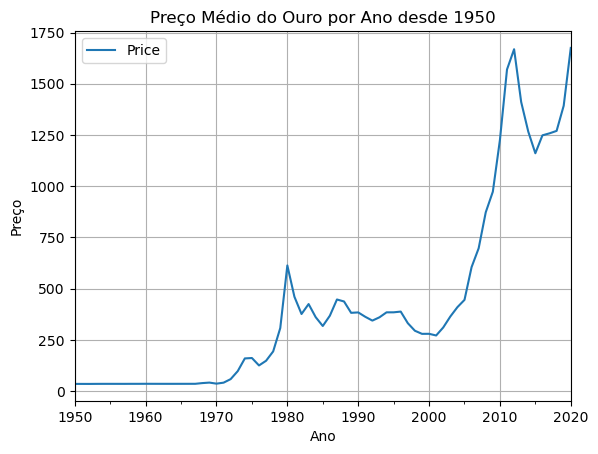

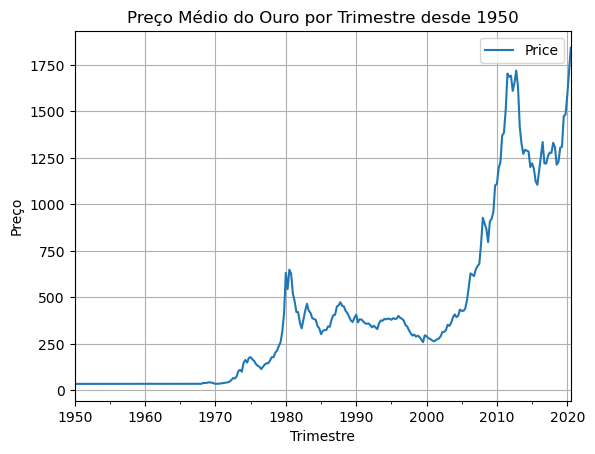

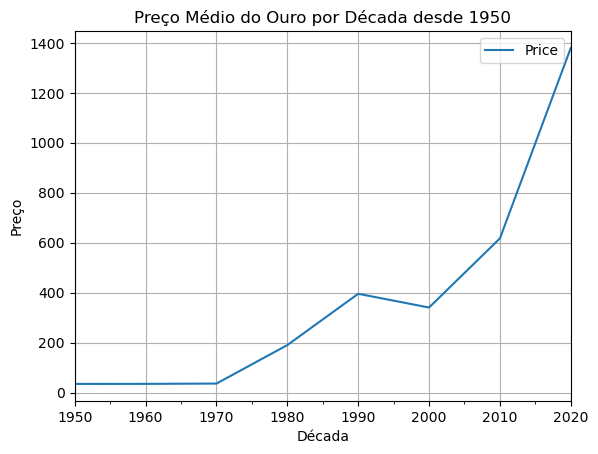

In [9]:
# Create yearly, quarterly, and decade summaries of the data
df_yearly_sum = df.resample('A').mean()
df_yearly_sum.plot()
plt.title('Preço Médio do Ouro por Ano desde 1950')
plt.xlabel('Ano')
plt.ylabel('Preço')
plt.grid()

df_quarterly_sum = df.resample('Q').mean()
df_quarterly_sum.plot()
plt.title('Preço Médio do Ouro por Trimestre desde 1950')
plt.xlabel('Trimestre')
plt.ylabel('Preço')
plt.grid()

df_decade_sum = df.resample('10Y').mean()
df_decade_sum.plot()
plt.title('Preço Médio do Ouro por Década desde 1950')
plt.xlabel('Década')
plt.ylabel('Preço')
plt.grid()


In [10]:
# Show summary statistics of the gold prices
print("Resumo estatístico dos preços do ouro:")
print(df.describe())

Resumo estatístico dos preços do ouro:
             Price
count   847.000000
mean    416.556906
std     453.665313
min      34.490000
25%      35.190000
50%     319.622000
75%     447.029000
max    1840.807000


As primeiras linhas dos dados do coeficiente de variação:
            Mean       Std    CV
month                           
1950   34.729167  0.002887  0.01
1951   34.717500  0.020057  0.06
1952   34.628333  0.117538  0.34
1953   34.879167  0.056481  0.16
1954   35.020000  0.082792  0.24


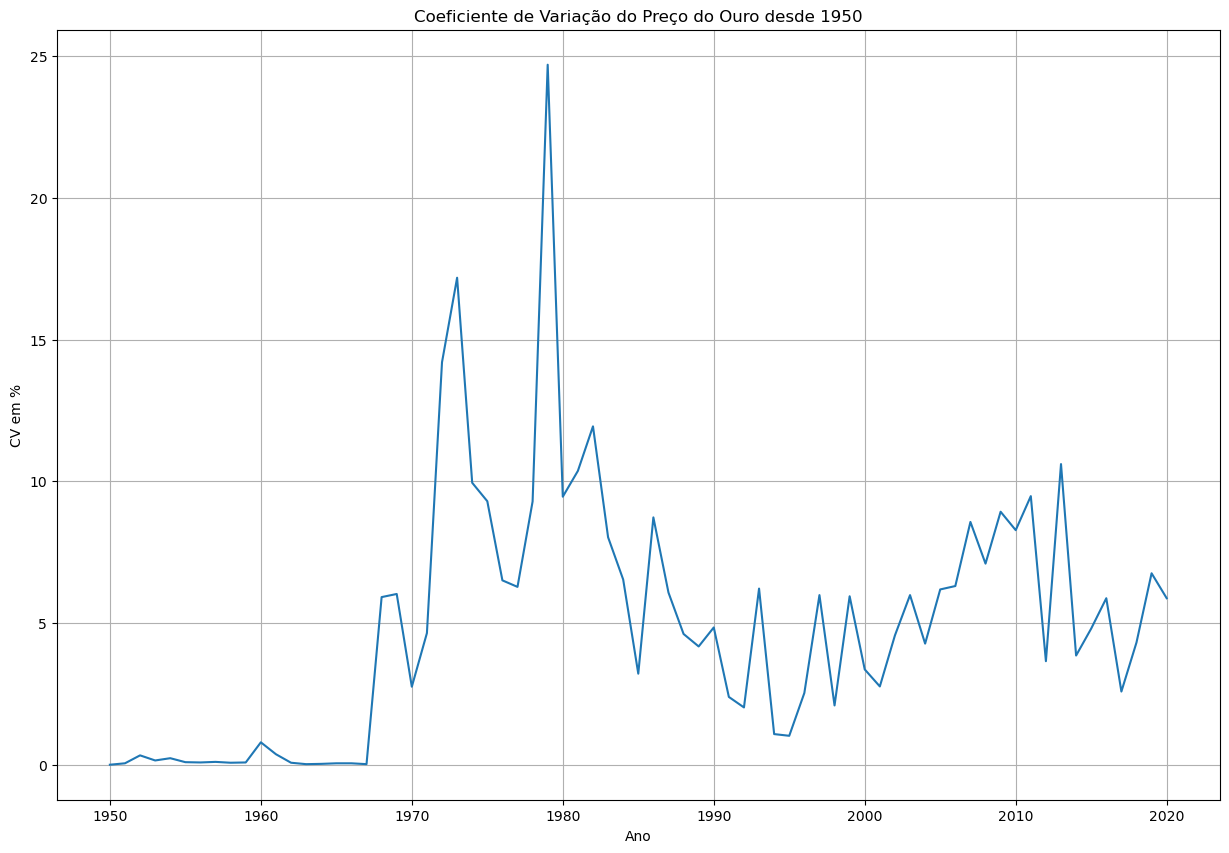

In [11]:
# Calculate the mean, standard deviation, and coefficient of variation (CV) for the data by year
df_mean = df.groupby(df.index.year).mean().rename(columns={'Price':'Mean'})
df_std = df.groupby(df.index.year).std().rename(columns={'Price':'Std'})
df_cv = ((df_std['Std'] / df_mean['Mean']) * 100).round(2)
df_stats = pd.concat([df_mean, df_std, df_cv], axis=1)
df_stats.columns = ['Mean', 'Std', 'CV']

# Plot the CV over time
fig, ax = plt.subplots(figsize=(15, 10))
df_stats['CV'].plot()
plt.title('Coeficiente de Variação do Preço do Ouro desde 1950')
plt.xlabel('Ano')
plt.ylabel('CV em %')
plt.grid()

# Display the first few rows of the data
print('As primeiras linhas dos dados do coeficiente de variação:')
print(df_stats.head())


In [12]:
# Split the dataset into training and testing sets based on a cutoff year
train = df[df.index.year <= 2015]
test = df[df.index.year > 2015]

# Check the shape of the training and testing sets
print("Formato do conjunto de treinamento:", train.shape)
print("Formato do conjunto de teste:", test.shape)

# Verificar viés na divisão
train_pct = len(train) / len(df) * 100
test_pct = len(test) / len(df) * 100
print("Porcentagem de dados no conjunto de treinamento:", round(train_pct, 2), '%')
print("Porcentagem de dados no conjunto de teste:", round(test_pct, 2), '%')

# Não há necessariamente viés na divisão dessa forma.
# No entanto, isso pode depender do problema específico e dos objetivos da análise.
# É sempre uma boa prática considerar cuidadosamente a divisão e testar diferentes proporções de divisão para avaliar seu impacto no desempenho do modelo.


Formato do conjunto de treinamento: (792, 1)
Formato do conjunto de teste: (55, 1)
Porcentagem de dados no conjunto de treinamento: 93.51 %
Porcentagem de dados no conjunto de teste: 6.49 %


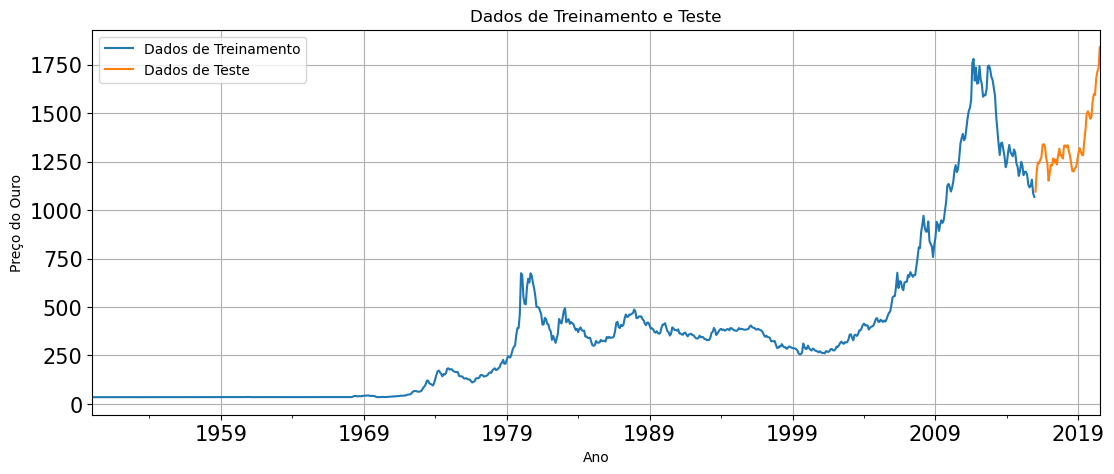

In [14]:
# Plot train and test data
train['Price'].plot(figsize=(13, 5), fontsize=15)
test['Price'].plot(figsize=(13, 5), fontsize=15)
plt.grid()
plt.legend(['Dados de Treinamento', 'Dados de Teste'])
plt.title('Dados de Treinamento e Teste')
plt.xlabel('Ano')
plt.ylabel('Preço do Ouro')
plt.show()


In [15]:
# Create time series for train and test data
train_time = [i+1 for i in range(len(train))]
test_time = [i+len(train)+1 for i in range(len(test))]
print(f"Comprimento da série temporal de treinamento: {len(train_time)}")
print(f"Comprimento da série temporal de teste: {len(test_time)}")

# Add time series as a feature to train and test data
LR_train = train.copy()
LR_test = test.copy()
LR_train['time'] = train_time
LR_test['time'] = test_time


Comprimento da série temporal de treinamento: 792
Comprimento da série temporal de teste: 55


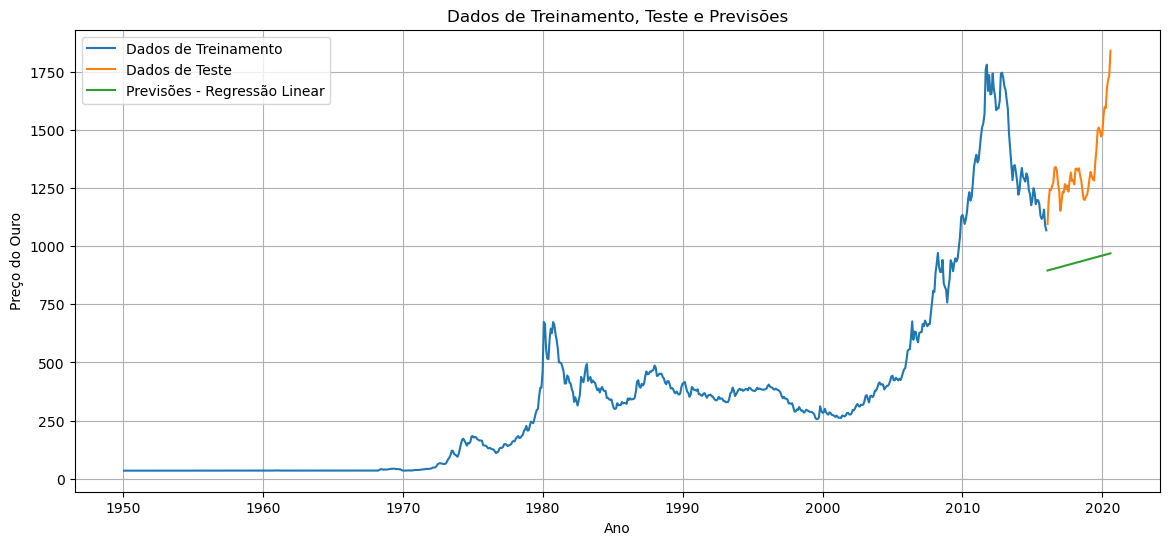

In [18]:
# Train a linear regression model on the train data using time as the independent variable
lr = LinearRegression()
lr.fit(LR_train[['time']], LR_train['Price'])

# Use the trained model to make predictions on the test data
test_predictions_model1 = lr.predict(LR_test[['time']])
LR_test['forecast'] = test_predictions_model1

# Plot the train data, test data, and predictions made by the linear regression model
plt.figure(figsize=(14, 6))
plt.plot(train['Price'], label='Dados de Treinamento')
plt.plot(test['Price'], label='Dados de Teste')
plt.plot(LR_test['forecast'], label='Previsões - Regressão Linear')
plt.legend(loc='best')
plt.grid()
plt.title('Dados de Treinamento, Teste e Previsões')
plt.xlabel('Ano')
plt.ylabel('Preço do Ouro')
plt.show()


In [19]:
def mape(y_true, y_pred):
    """Calculate mean absolute percentage error (MAPE)"""
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Calculate MAPE for the linear regression model
mape_model1_test = mape(test['Price'].values, test_predictions_model1)
print(f"MAPE for Regression on Time model on test data: {mape_model1_test:.3f}%")

MAPE for Regression on Time model on test data: 29.760%


In [20]:
# Criar um dataframe de resultados para armazenar os valores de MAPE para diferentes modelos
results = pd.DataFrame({'MAPE nos dados de teste (%)': [mape_model1_test]}, index=['Regressão no Tempo'])
results


,MAPE nos dados de teste (%)
Regressão no Tempo,29.759658


In [21]:
# Criar o modelo ingênuo
naive_train = train.copy()
naive_test = test.copy()
naive_test['naive'] = np.asarray(train['Price'])[-1]
naive_test['naive'].head()

month
2016-01-31    1068.317
2016-02-29    1068.317
2016-03-31    1068.317
2016-04-30    1068.317
2016-05-31    1068.317
Name: naive, dtype: float64

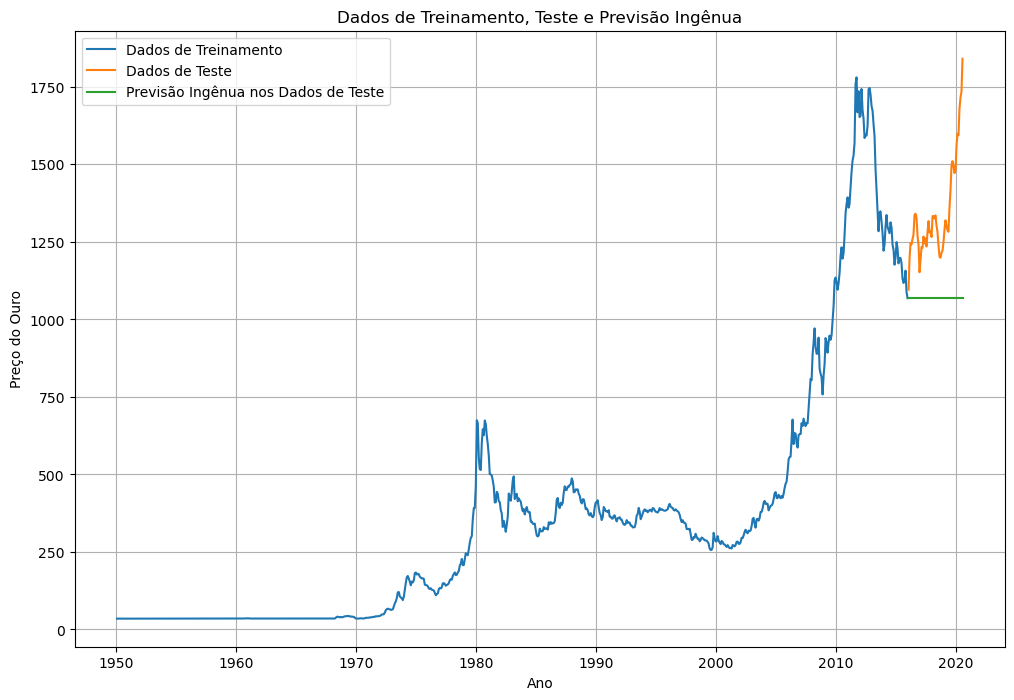

In [22]:
# Plot the train, test, and naive forecast on test data
plt.figure(figsize=(12, 8))
plt.plot(naive_train['Price'], label='Dados de Treinamento')
plt.plot(test['Price'], label='Dados de Teste')
plt.plot(naive_test['naive'], label='Previsão Ingênua nos Dados de Teste')
plt.legend(loc='best')
plt.grid()
plt.title('Dados de Treinamento, Teste e Previsão Ingênua')
plt.xlabel('Ano')
plt.ylabel('Preço do Ouro')
plt.show()


In [23]:
# Calculate MAPE for naive forecast model
mape_model2_test = mape(test['Price'].values, naive_test['naive'].values)
print(f"MAPE para o modelo de Previsão Ingênua é de {mape_model2_test:.3f}%")

# Update the dataframe with the MAPE result for the naive forecast model
results_df2 = pd.DataFrame({'MAPE nos dados de teste (%)': [mape_model2_test]}, index=['Previsão Ingênua'])
results = pd.concat([results, results_df2])

# Display the dataframe with the MAPE results for both models
results


MAPE para o modelo de Previsão Ingênua é de 19.385%


,MAPE nos dados de teste (%)
Regressão no Tempo,29.759658
Previsão Ingênua,19.384586


In [24]:
# Perform exponential smoothing with additive trend and additive seasonality
final_model = ExponentialSmoothing(df, trend='add', seasonal='add').fit(
    smoothing_level=0.4, smoothing_trend=0.3, smoothing_seasonal=0.6)

# Calculate mean absolute percentage error (MAPE) of the fitted values
mape_final_model = mape(df['Price'].values, final_model.fittedvalues)
print(f"MAPE do modelo final: {mape_final_model:.3f}%")



MAPE do modelo final: 17.235%


In [25]:
# Generate forecast using the final model
prediction = final_model.forecast(steps=len(test))

# Create a dataframe to store the prediction and confidence intervals
pred_df = pd.DataFrame({
    'lower_CI': prediction - 1.96 * np.std(final_model.resid, ddof=1),
    'prediction': prediction,
    'upper_CI': prediction + 1.96 * np.std(final_model.resid, ddof=1)
})

# Export the predictions into a csv file.
pred_df.to_csv('gold_price_predictions.csv', index=True, index_label='Month') 

print('Prediction and confidence intervals:')
pred_df


Prediction and confidence intervals:


,lower_CI,prediction,upper_CI
2020-08-31,1684.720065,1792.871037,1901.022009
2020-09-30,1615.306077,1723.457050,1831.608022
2020-10-31,1538.567922,1646.718895,1754.869867
2020-11-30,1476.758600,1584.909572,1693.060545
2020-12-31,1459.327290,1567.478262,1675.629235
2021-01-31,1514.417601,1622.568574,1730.719546
2021-02-28,1545.352396,1653.503369,1761.654341
2021-03-31,1556.764378,1664.915350,1773.066323
2021-04-30,1648.309829,1756.460802,1864.611774
2021-05-31,1694.225915,1802.376887,1910.527859


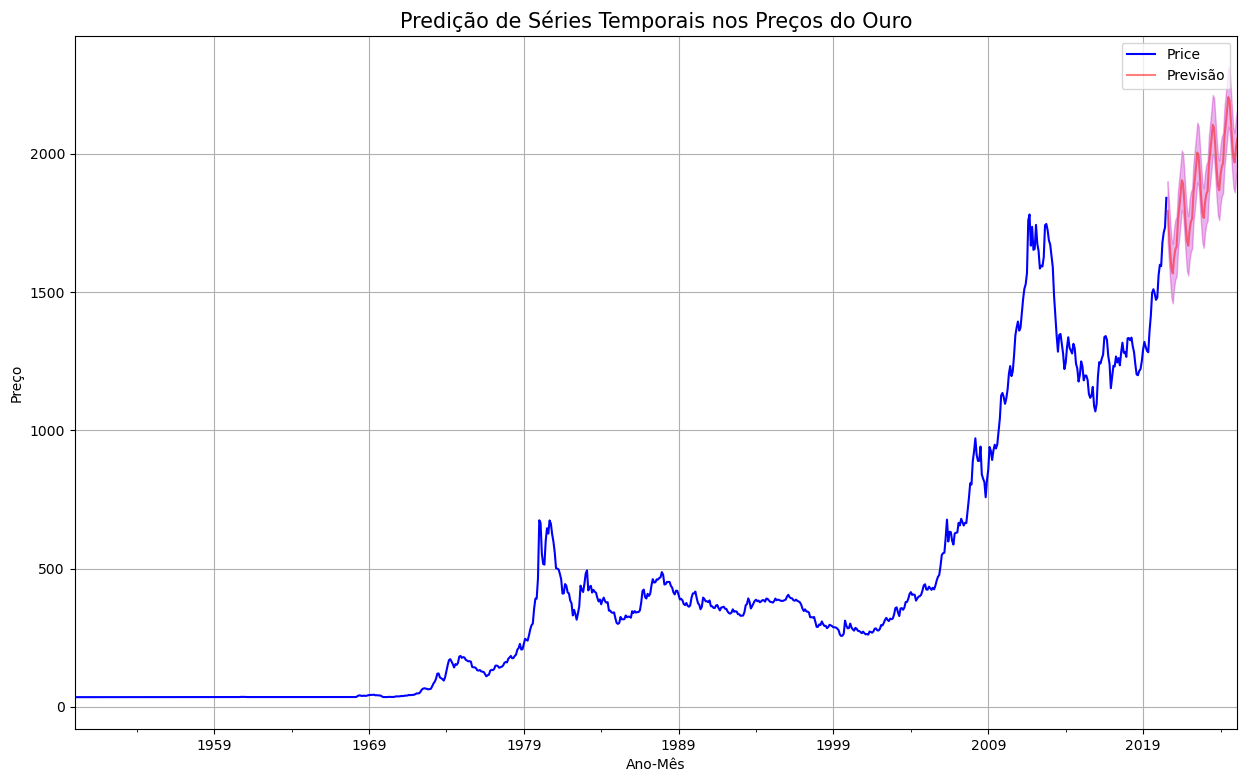

<Figure size 640x480 with 0 Axes>

In [33]:
# Plot actual and predicted values with confidence intervals
axis = df.plot(label='Atual', figsize=(15, 9), color='b')
pred_df['prediction'].plot(ax=axis, label='Previsão', color='r', alpha=0.5)
axis.fill_between(pred_df.index, pred_df['lower_CI'], pred_df['upper_CI'], color='m', alpha=0.3)
axis.set_xlabel('Ano-Mês')
axis.set_ylabel('Preço')
plt.title('Predição de Séries Temporais nos Preços do Ouro', fontsize=15)
plt.legend(loc='best')
plt.grid()
plt.show()

# Save plot as png
plt.savefig('gold_price_predictions.png')
